In [5]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sci-kit learn



You should consider upgrading via the '/Users/sahildeswal/Library/CloudStorage/GoogleDrive-deshwalsahil7@gmail.com/My Drive/AIML_IITG/.venv/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 10.8 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 3.4 MB/s eta 0:00:01
You should consider upgrading via the '/Users/sahildeswal/Library/CloudStorage/GoogleDrive-deshwalsahil7@gmail.com/My Drive/AIML_IITG/.venv/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 7.8 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 3.3 MB/s eta 0:00:01
You sh

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from google.colab import drive
#drive.mount("/content/drive")

In [10]:
!pip install sklearn

    ERROR: Command errored out with exit status 1:
     command: '/Users/sahildeswal/Library/CloudStorage/GoogleDrive-deshwalsahil7@gmail.com/My Drive/AIML_IITG/.venv/bin/python3' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/sy/gfv5kz397jnfgcw3q_d_wjt40000gn/T/pip-install-r6fm7sas/sklearn_98b7e96634ab46098c91e9c1694b07aa/setup.py'"'"'; __file__='"'"'/private/var/folders/sy/gfv5kz397jnfgcw3q_d_wjt40000gn/T/pip-install-r6fm7sas/sklearn_98b7e96634ab46098c91e9c1694b07aa/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/sy/gfv5kz397jnfgcw3q_d_wjt40000gn/T/pip-pip-egg-info-n4up3bd5
         cwd: /private/var/folders/sy/gfv5kz397jnfgcw3q_d_wjt40000gn/T/pip-install-r6fm7sas/sklearn_98b7e96634ab

In [11]:
#Task 1
df = pd.read_csv("/Users/sahildeswal/Library/CloudStorage/GoogleDrive-deshwalsahil7@gmail.com/My Drive/AIML_IITG/Datasets/housing_data_IITG.csv")
print(df)
X = df.drop(columns="Price",axis=1)
y = df["Price"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_tr_sc = sc.fit_transform(x_train)
x_te_sc = sc.transform(x_test)

        Area  Bedrooms  Bathrooms  Age  LocationScore  DistanceToCity  \
0    1623.62         4        3.9   29           7.91           12.49   
1    3352.14         3        3.7   14           1.79           10.06   
2    2695.98         1        1.6   26           5.55            3.06   
3    2295.98         4        1.2   33           9.39           19.18   
4     968.06         4        1.3   37           3.89           22.21   
..       ...       ...        ...  ...            ...             ...   
195  1547.63         3        1.6   48           6.43           25.22   
196  2677.87         5        1.4   11           8.26            7.30   
197  3191.33         4        1.0   46           9.66           25.00   
198  3161.26         3        2.1    0           9.50            4.05   
199  2839.63         1        2.8   25           2.27            1.88   

         Price  
0    395213.14  
1    546600.63  
2    447053.81  
3    467795.94  
4    220091.69  
..         ...  
195 

In [12]:
#task 2
from sklearn.preprocessing import PolynomialFeatures
degree = [1,2,3]
alphas = [0.01,0.1,1,10,100]
poly_train = {}
poly_test = {}
for d in degree:
  poly = PolynomialFeatures(degree=d,include_bias=False)
  X_poly_train = poly.fit_transform(x_tr_sc)
  x_poly_test = poly.transform(x_te_sc)
  poly_train[d]=X_poly_train
  poly_test[d]=x_poly_test


In [13]:
#task 3
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
scores = []
alphas = [0.01,0.1,1,10,100]
for d in degree:
  for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    cross_score = cross_val_score(ridge_model,poly_train[d],y_train,cv=5,scoring = "r2")
    scores.append([d,alpha,np.mean(cross_score)])
summary = pd.DataFrame(scores,columns = ["Degree","Alpha","R2_score"])

/Users/sahildeswal/Library/CloudStorage/GoogleDrive-deshwalsahil7@gmail.com/My Drive/AIML_IITG/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sahildeswal/Library/CloudStorage/GoogleDrive-deshwalsahil7@gmail.com/My Drive/AIML_IITG/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sahildeswal/Library/CloudStorage/GoogleDrive-deshwalsahil7@gmail.com/My Drive/AIML_IITG/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/sahildeswal/Library/CloudStorage/GoogleDrive-deshwalsahil7@gmail.com/My Drive/AIML_IITG/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sahildeswal/Library/CloudStorage/GoogleDrive-deshwalsahil7@gmail.com/My Drive/AIML_IITG/.venv/li

In [14]:
summary

,Degree,Alpha,R2_score
0,1,0.01,0.951660
1,1,0.10,0.951657
2,1,1.00,0.951571
3,1,10.00,0.945393
4,1,100.00,0.744785
5,2,0.01,0.950601
6,2,0.10,0.950662
7,2,1.00,0.951133
8,2,10.00,0.945359
9,2,100.00,0.720870


In [15]:
summary.sort_values("R2_score",ascending=False)

,Degree,Alpha,R2_score
0,1,0.01,0.951660
1,1,0.10,0.951657
2,1,1.00,0.951571
7,2,1.00,0.951133
6,2,0.10,0.950662
5,2,0.01,0.950601
3,1,10.00,0.945393
8,2,10.00,0.945359
11,3,0.10,0.886089
10,3,0.01,0.883993


In [16]:
best_row = summary.loc[summary["R2_score"].idxmax()]


In [17]:
best_row

Degree      1.00000
Alpha       0.01000
R2_score    0.95166
Name: 0, dtype: float64

In [18]:
best_degree = best_row["Degree"]
best_alpha = best_row["Alpha"]
best_r2_score = best_row["R2_score"]

In [20]:
best_alpha

np.float64(0.01)

In [21]:
best_degree

np.float64(1.0)

In [22]:
best_r2_score

np.float64(0.9516596863933808)

Final model

In [23]:
poly = PolynomialFeatures(degree=int(best_degree),include_bias=False)
poly_x_tr = poly.fit_transform(x_tr_sc)
poly_x_te = poly.transform(x_te_sc)
model = Ridge(alpha=best_alpha)
model.fit(poly_x_tr,y_train)
model

Ridge(alpha=np.float64(0.01))

In [24]:
model_pred = model.predict(poly_x_te)

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
r2 = r2_score(y_test,model_pred)
mse = mean_squared_error(y_test,model_pred)

In [26]:
r2

0.9419141186924735

In [27]:
mse

706264027.0332067

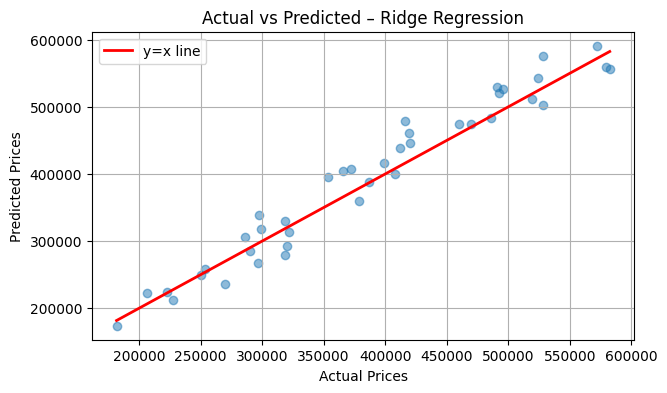

In [28]:
plt.figure(figsize=(7,4))
plt.scatter(y_test, model_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color="red", linewidth=2, label="y=x line")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted – Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()